<a href="https://colab.research.google.com/github/Raji14021996/Final-Internship/blob/main/Internship%20project-%5BEDA%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXPLORTARY DATAANALYSIS

Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

loading dataset to pandas data frame


In [2]:
df=pd.read_excel('/content/Online Retail.xlsx')

first few rows

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceTime,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 00:00:00,8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,8:27,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,8:28,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 00:00:00,8:29,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,8:30,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   InvoiceTime  541909 non-null  object        
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
InvoiceTime         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.shape

(541909, 9)

In [7]:
df.duplicated().sum()

0

In [8]:
df.nunique()

InvoiceNo       25900
StockCode        4070
Description      4223
Quantity          722
InvoiceDate     23261
InvoiceTime    541909
UnitPrice        1630
CustomerID       4372
Country            38
dtype: int64

In [9]:
#Handling missing values
#we have missing values in description and customerid

In [10]:
#there are many duplicated values in the dataset in the columns quantity, invoice date, invoice time
#and country but they are necessary values which cant be removed
#the customer id consists of many null values but the customer id column cannot be filled with duplicate
#values of values of other orders so we will drop the column

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
InvoiceTime    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [13]:
df.shape

(406829, 9)

In [14]:
df.duplicated().sum()

0

In [15]:
df['Quantity']

0          6
1          6
2          8
3          6
4          6
          ..
541904    12
541905     6
541906     4
541907     4
541908     3
Name: Quantity, Length: 406829, dtype: int64

In [16]:
df['Quantity'].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     72,    200,    600,
          480,     -6,     14,     -2,     -4,     -5,     -7,     -3,
           11,     70,    252,     60,    216,    384,     27,    108,
           52,  -9360,     75,    270,     42,    240,     90,    320,
           17,   1824,    204,     69,    -36,   -192,   -144,    160,
         2880,   1400,     19,     39,    -48,    -50,     56,     13,
         1440,     -8,     15,    720,    -20,    156,    324,     41,
          -10,    -72,    -11,    402,    378,    150,    300,     22,
           34,    408,    972,    208,   1008,     26,   1000,    -25,
         1488,    250,   1394,    400,    110,    -14,     37,    -33,
      

In [17]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceTime,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,8:167,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,8:180,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,8:261,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,8:262,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,8:263,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,8:540475,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,8:541567,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,8:541741,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,8:541742,1.25,17315.0,United Kingdom


In [18]:
#there are negative values in our quantity column in our dataframe which have to be corrected
df['Quantity'] = df['Quantity'].abs()

In [19]:
df.shape

(406829, 9)

In [20]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceTime,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 00:00:00,8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,8:27,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,8:28,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 00:00:00,8:29,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,8:30,3.39,17850.0,United Kingdom


In [21]:
#we have handled missing values using drop and converted the negative values in the quantity column to
#positive values using abs()

Basic Staistics

In [22]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,13.412279,3.460471,15287.690570
std,248.624170,69.315162,1713.600303
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


Data Visualization

In [23]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'InvoiceTime', 'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [56]:
country_totals=df.groupby('Country')['Quantity'].sum()

In [57]:
top_20_countries=country_totals.nlargest(20)

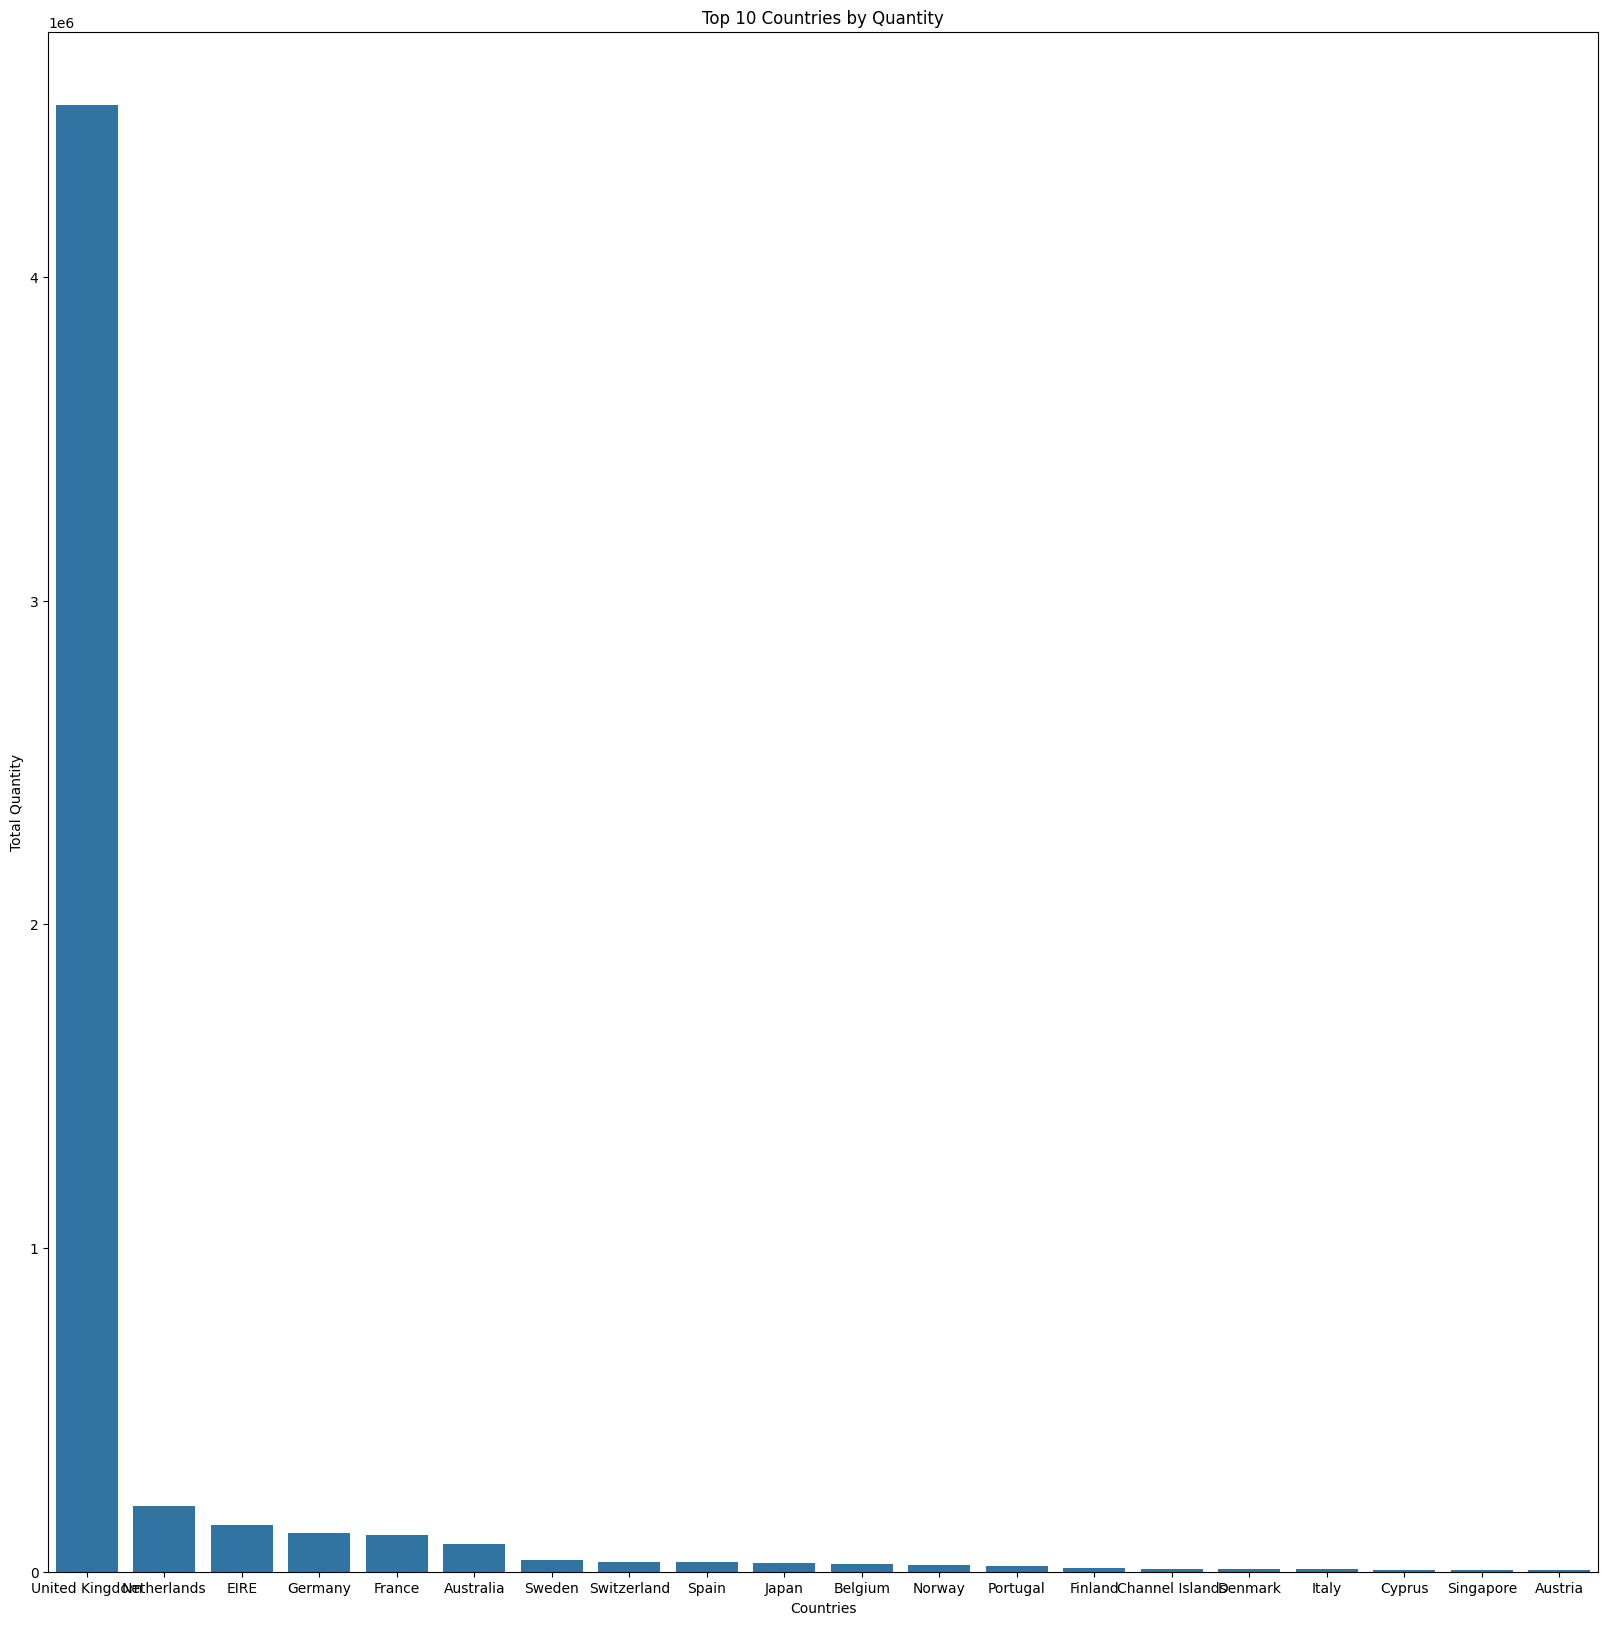

In [59]:
plt.figure(figsize=(20,20))
sns.barplot(x=top_20_countries.index, y=top_20_countries.values)
plt.title('Top 10 Countries by Quantity')
plt.xlabel('Countries')
plt.ylabel('Total Quantity')
plt.show()

top selling products

In [61]:
products_quantity=df.groupby('Description')['Quantity'].sum()

In [62]:

top_10_products=products_quantity.nlargest(10)

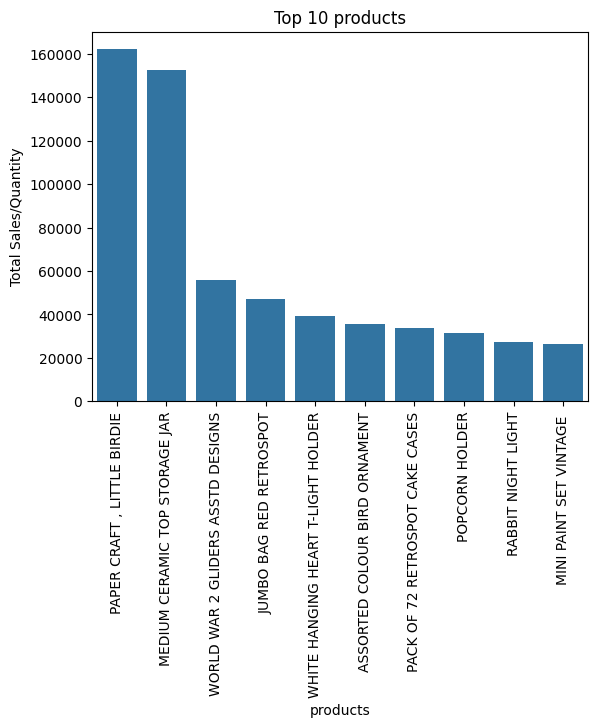

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [63]:
sns.barplot(x=top_10_products.index, y=top_10_products.values)
plt.title('Top 10 products')
plt.xlabel('products')
plt.ylabel('Total Sales/Quantity')
plt.xticks(rotation='vertical')
plt.show()
plt.figure(figsize=(20,20))

In [64]:
#as we can see that there is a lot of difference between the orders from other countries and america

In [65]:
type(df['InvoiceDate'])

pandas.core.series.Series

In [66]:
pd.to_datetime(df['InvoiceDate'])

0        2010-12-01 00:00:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 00:00:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 406829, dtype: datetime64[ns]

In [67]:
type(df['InvoiceDate'])

pandas.core.series.Series

In [68]:
df['Year']=df['InvoiceDate'].dt.strftime('%Y')

In [69]:
df['Month']=df['InvoiceDate'].dt.strftime('%m')

In [70]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceTime,UnitPrice,CustomerID,Country,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 00:00:00,8:26,2.55,17850.0,United Kingdom,2010,12,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,8:27,3.39,17850.0,United Kingdom,2010,12,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,8:28,2.75,17850.0,United Kingdom,2010,12,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 00:00:00,8:29,3.39,17850.0,United Kingdom,2010,12,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,8:30,3.39,17850.0,United Kingdom,2010,12,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,8:541930,0.85,12680.0,France,2011,12,Friday
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,8:541931,2.10,12680.0,France,2011,12,Friday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,8:541932,4.15,12680.0,France,2011,12,Friday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,8:541933,4.15,12680.0,France,2011,12,Friday


In [71]:
import statistics as sc

In [72]:
sc.mode(df['Month'])

'11'

In [73]:

#as we can see that the sales happened were mostly in the month of '11' which is november

In [74]:
sc.mode(df['Year'])

'2011'

In [75]:
#and in the year 2011 most of the sales were made

<Axes: xlabel='count', ylabel='Month'>

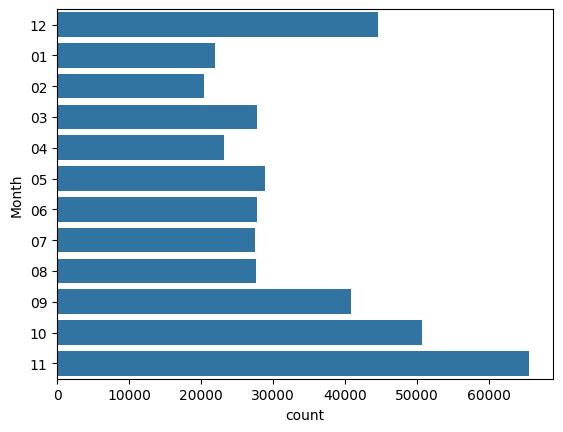

In [76]:
sns.countplot(df['Month'])

In [77]:
#as we can see from the countplot which shows the number of sales in each month we can see that the november month is the busiest

In [78]:
df['Day']=df['InvoiceDate'].dt.strftime('%A')

<Axes: xlabel='count', ylabel='Day'>

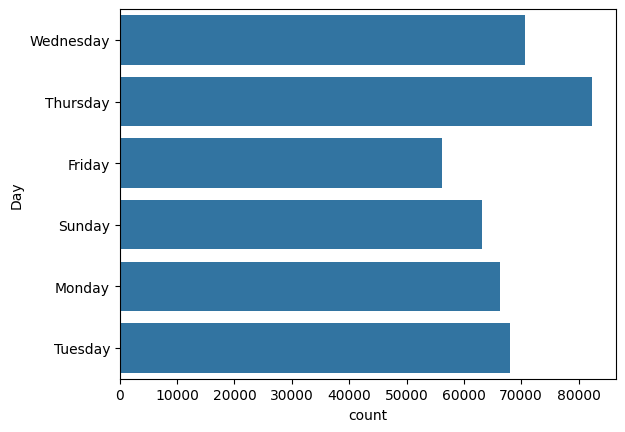

In [79]:
sns.countplot(df['Day'])

In [80]:
#The above countplot shows us that we can see that the thursday is the most busiest day

In [81]:
type(df['Description'])

pandas.core.series.Series

In [82]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
                                      ... 
ANTIQUE RASPBERRY FLOWER EARRINGS        1
WALL ART,ONLY ONE PERSON                 1
GOLD/AMBER DROP EARRINGS W LEAF          1
INCENSE BAZAAR PEACH                     1
PINK BAROQUE FLOCK CANDLE HOLDER         1
Name: Description, Length: 3896, dtype: int64

In [83]:
#we can see that the WHITE HANGING HEART T-LIGHT HOLDER is the highest occuring item

max selling product

In [84]:

max(df.groupby('Description')['Quantity'].sum())

161990

In [85]:
df['Description'].mode()

0    WHITE HANGING HEART T-LIGHT HOLDER
Name: Description, dtype: object

In [86]:
#The WHITE HANGING HEART T-LIGHT HOLDER is the product which is bought 161990

In [87]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceTime,UnitPrice,CustomerID,Country,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 00:00:00,8:26,2.55,17850.0,United Kingdom,2010,12,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,8:27,3.39,17850.0,United Kingdom,2010,12,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,8:28,2.75,17850.0,United Kingdom,2010,12,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 00:00:00,8:29,3.39,17850.0,United Kingdom,2010,12,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,8:30,3.39,17850.0,United Kingdom,2010,12,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,8:541930,0.85,12680.0,France,2011,12,Friday
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,8:541931,2.10,12680.0,France,2011,12,Friday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,8:541932,4.15,12680.0,France,2011,12,Friday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,8:541933,4.15,12680.0,France,2011,12,Friday


<Axes: >

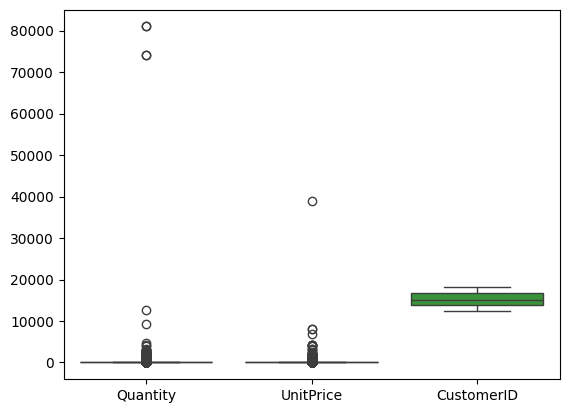

In [88]:
sns.boxplot(df)

<Axes: xlabel='Quantity', ylabel='Density'>

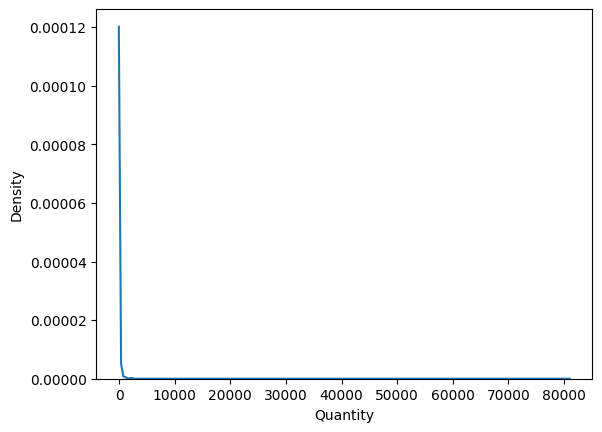

In [89]:
sns.kdeplot(df['Quantity'])

Sales Trend

In [90]:
df['sales']=df['Quantity']*df['UnitPrice']

In [91]:
df['sales']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: sales, Length: 406829, dtype: float64

<Axes: xlabel='Year'>

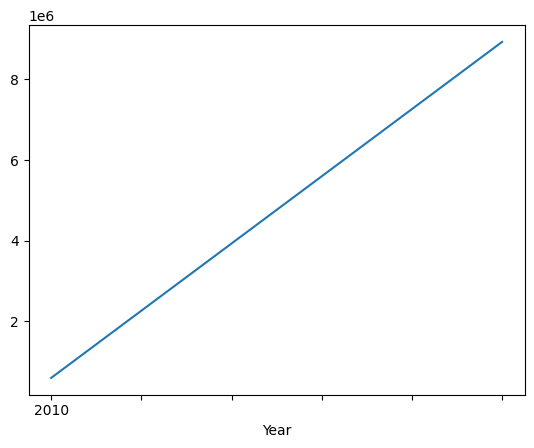

In [93]:
df.groupby('Year')['sales'].sum().plot(kind='line')

Conclusion:

In [ ]:
#we have found out the outliers in the data frame where we have got only two columns of quantity and custmerID.
#outliers in customerID but in quantity there are many outliers. The ouliers present in the Quantity column can definitely effect the model
#but the outliers are equally spread out throughout the dataset so the the extreme values in the outliers can effect the mean of the model
# the positive and negative outliers can out-weigh each other as the box plot shows that outliers present are almost equally
#distributed
#so as the outliers are distributed equally the median might be the good measure of central tendency
#these outliers may also effect while checking the datadistribution and kurtosis
#there were many negative values in the quantity column which is not possible so i have taken the absolute value of the negative values
#in the quantity column

In [ ]:
#The statistical operations can only be checked for the quantity and customer id as they are the numerical columns in the data
#From the statistical analysis of the quantity column we have found out that the average quantity sold is 13.41 but this value may have
#slightly gone up or down because of the skewness of the data which is effected by the outliers
#The 25 percent of the items sold are 2
#The 50 percent of the items sold are 5
#The 75 percent of the items sold are 12
#as we can see from the kdeplot the quantity is spread out to a great extent in both positive and negative side but most of the data is
#distributed around 0 which means the outliers may have effect on the model's accuracy but very slightly.